In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone "https://github.com/shubhamthakar/ProtoKD" "/content/drive/MyDrive/ProtoKD"

fatal: destination path '/content/drive/MyDrive/ProtoKD' already exists and is not an empty directory.


In [3]:
!python -m pip install medpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.8 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.5.1-cp310-cp310-linux_x86_64.whl size=762858 sha256=54e89fe5d5de5e24275b04c35034fdedcb72d605164272dad7452bdc22ccd31c
  Stored in directory: /root/.cache/pip/wheels/e6/8f/f9/7fec657d34ad3ebd2ea3ca5ad0e526f8fea93c3fb4a26c3416
Successfully built medpy


In [ ]:
%cd /content/drive/MyDrive/ProtoKD/code
!pwd
!python pretrain.py --log_dir ../log/teachermodel

Streaming output truncated to the last 5000 lines.
Best epoch is: 439
Epoch:[445/1000],iteration:446, loss: 0.206876
Epoch 445 training time :0.023875 minutes
---Start epoch 445 validation
Sample [0], average dice : 0.892000
Sample [1], average dice : 0.917409
Epoch 445 validation time : 0.048501 minutes
epoch 445 val dice, wt_dice:0.903127, co_dice:0.934606, ec_dice:0.876380
Best dice is: 0.923852
Best epoch is: 439
Epoch:[446/1000],iteration:447, loss: 0.210412
Epoch 446 training time :0.024237 minutes
---Start epoch 446 validation
Sample [0], average dice : 0.899170
Sample [1], average dice : 0.921097
Epoch 446 validation time : 0.050306 minutes
epoch 446 val dice, wt_dice:0.912606, co_dice:0.937668, ec_dice:0.880126
Best dice is: 0.923852
Best epoch is: 439
Epoch:[447/1000],iteration:448, loss: 0.201887
Epoch 447 training time :0.029519 minutes
---Start epoch 447 validation
Sample [0], average dice : 0.907105
Sample [1], average dice : 0.923656
Epoch 447 validation time : 0.050681 

In [8]:
!python train_protokd.py --modality 0 --log_dir ../log/protokd_modality0

2024-04-13 02:12:43.876150: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 02:12:43.876202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 02:12:43.877539: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-13 02:12:43.884703: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-13 02:12:44.935791: W tensorflow/compiler/tf2

In [9]:
%cd /content/drive/MyDrive/ProtoKD/code
!pwd
!python evaluate.py --model_path ../log/protokd_modality0/model/best_model.pth \
                   --test_modality 0 \
                   --output_path protokd_modality0_outputs \
                   --save_vis

/content/drive/MyDrive/ProtoKD/code
/content/drive/MyDrive/ProtoKD/code
gpu 0
num_channels 1
data_dir ../data
model_path ../log/protokd_modality0/model/best_model.pth
num_cls 4
test_modality [0]
output_path protokd_modality0_outputs
save_vis True
### Load trained model
### Prepare test dataset
### test set has 2 volumes
Namespace(gpu='0', num_channels=1, data_dir='../data', model_path='../log/protokd_modality0/model/best_model.pth', num_cls=4, test_modality=[0], output_path='protokd_modality0_outputs', save_vis=True)
------------------------------------------------------------------------
100%|███████████████████████████████████| 2/2 [00:12<00:00,  6.13s/it]
Statistical indicators on test set(wt/co/ec):
Dice:[74.48,75.50,58.10]
HD:[8.35410,5.69258,6.26958]
Sen:[0.82644,0.76626,0.57928]
Spe:[0.99409,0.99849,0.99821]
Average dice is 69.35943633024074.
Average hd is 6.772087427829757.
Average spe is 0.9969278238085829.
Average sen is 0.7239946968051015.
Evaluation is finished
############

In [10]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [25]:
test_load = nib.load('/content/drive/MyDrive/ProtoKD/code/protokd_modality0_outputs/Brats18_2013_2_1/image_0.nii.gz').get_fdata()
test_load.shape

(192, 192, 140)

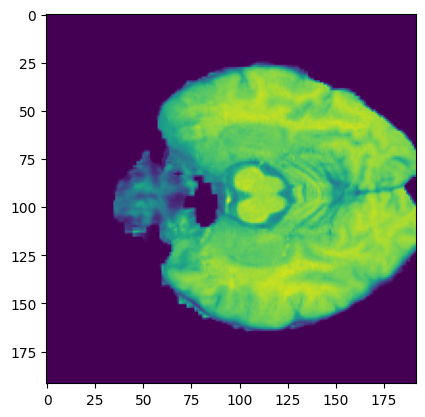

In [26]:
test = test_load[:,:,49]
plt.imshow(test)
plt.show()

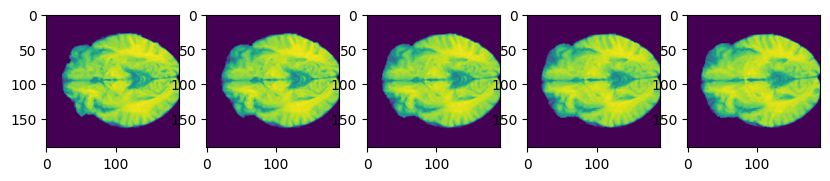

In [32]:
for i in range(5):
    plt.subplot(5, 5,i + 1)
    plt.imshow(test_load[:,:,59 + i])
    plt.gcf().set_size_inches(10, 10)
plt.show()

In [34]:
test_pred = nib.load('/content/drive/MyDrive/ProtoKD/code/protokd_modality0_outputs/Brats18_2013_2_1/predict.nii.gz').get_fdata()
test_pred.shape

(192, 192, 140)

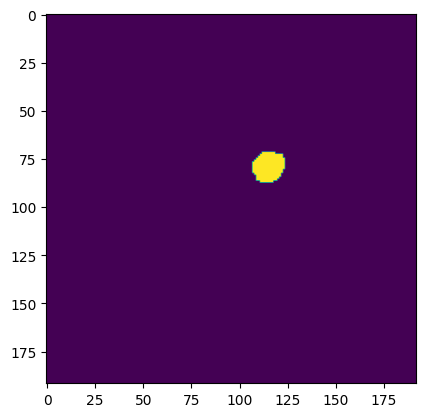

In [35]:
test_pred1 = test_pred[:,:,70]
plt.imshow(test_pred1)
plt.show()

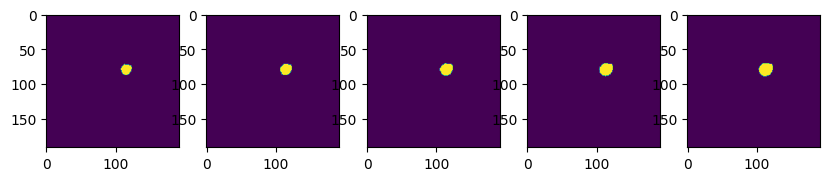

In [38]:
for i in range(5):
    plt.subplot(5, 5,i + 1)
    plt.imshow(test_pred[:,:,69 + i])
    plt.gcf().set_size_inches(10, 10)
plt.show()

In [29]:
test_label = nib.load('/content/drive/MyDrive/ProtoKD/code/protokd_modality0_outputs/Brats18_2013_2_1/label.nii.gz').get_fdata()
test_label.shape

(192, 192, 140)

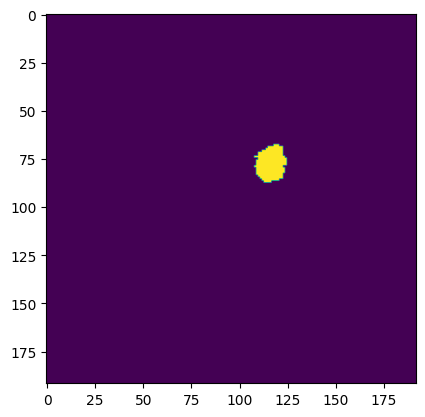

In [30]:
test_label = test_label[:,:,70]
plt.imshow(test_label)
plt.show()